In [43]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer, 
    recall_score
)



# mcdaniel: i had to add these two for the dtree sections.
from sklearn import metrics
from sklearn import tree


# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
data_orig = pd.read_csv("out/out_train.csv")
data = data_orig.copy()

Create heat maps

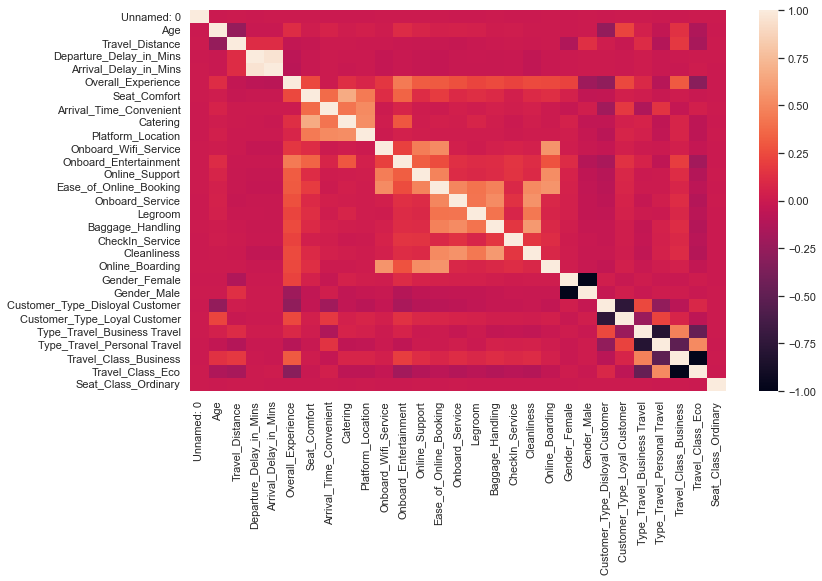

In [3]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data.corr())
plt.show()

* Ease_of_Online_Booking
* Onboard_Service
* Online Boarding
* Legroom
* Baggage Handling

Onboard_Wifi_Service Vs Ease_of_Online_Booking
Onboard_Wifi_Service Vs Online_Support

Seat_Comfort Vs Catering
Arrival_Time_Convenient Vs Platform_Location
Catering Vs Platform_Location

Secondary factors
- Travel_Class_Business
- 


**Separating the independent variables (X) and the dependent variable (Y)**

In [108]:
X = pd.read_csv("out/out_train.csv").copy()
Y = X["Overall_Experience"]

X.drop(columns = X.columns[0], axis = 1, inplace= True)
X = X.drop(["Overall_Experience"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

Z_test = pd.read_csv("out/out_test.csv").copy()
Z_Ids = Z_test["ID"]

Z_test.drop(columns = Z_test.columns[0], axis = 1, inplace= True)
Z_test = Z_test.drop(["ID"], axis = 1)


In [109]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66065 entries, 90112 to 68264
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              66065 non-null  float64
 1   Travel_Distance                  66065 non-null  int64  
 2   Departure_Delay_in_Mins          66065 non-null  float64
 3   Arrival_Delay_in_Mins            66065 non-null  float64
 4   Seat_Comfort                     66065 non-null  float64
 5   Arrival_Time_Convenient          66065 non-null  float64
 6   Catering                         66065 non-null  float64
 7   Platform_Location                66065 non-null  float64
 8   Onboard_Wifi_Service             66065 non-null  float64
 9   Onboard_Entertainment            66065 non-null  float64
 10  Online_Support                   66065 non-null  float64
 11  Ease_of_Online_Booking           66065 non-null  float64
 12  Onboard_Servic

In [110]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 66065 entries, 90112 to 68264
Series name: Overall_Experience
Non-Null Count  Dtype
--------------  -----
66065 non-null  int64
dtypes: int64(1)
memory usage: 1.0 MB


In [111]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28314 entries, 81488 to 42255
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              28314 non-null  float64
 1   Travel_Distance                  28314 non-null  int64  
 2   Departure_Delay_in_Mins          28314 non-null  float64
 3   Arrival_Delay_in_Mins            28314 non-null  float64
 4   Seat_Comfort                     28314 non-null  float64
 5   Arrival_Time_Convenient          28314 non-null  float64
 6   Catering                         28314 non-null  float64
 7   Platform_Location                28314 non-null  float64
 8   Onboard_Wifi_Service             28314 non-null  float64
 9   Onboard_Entertainment            28314 non-null  float64
 10  Online_Support                   28314 non-null  float64
 11  Ease_of_Online_Booking           28314 non-null  float64
 12  Onboard_Servic

In [112]:
Z_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              35602 non-null  float64
 1   Travel_Distance                  35602 non-null  int64  
 2   Departure_Delay_in_Mins          35602 non-null  float64
 3   Arrival_Delay_in_Mins            35602 non-null  float64
 4   Seat_Comfort                     35602 non-null  float64
 5   Arrival_Time_Convenient          35602 non-null  float64
 6   Catering                         35602 non-null  float64
 7   Platform_Location                35602 non-null  float64
 8   Onboard_Wifi_Service             35602 non-null  float64
 9   Onboard_Entertainment            35602 non-null  float64
 10  Online_Support                   35602 non-null  float64
 11  Ease_of_Online_Booking           35602 non-null  float64
 12  Onboard_Service   

In [97]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))


Shape of Training set :  (66065, 27)
Shape of test set :  (28314, 27)
Percentage of classes in training set:
1    0.546659
0    0.453341
Name: Overall_Experience, dtype: float64


**create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [12]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Satisfied', 'Unsatisfied'], yticklabels=['Unsatisfied', 'Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Logistic Regression Model**

In [13]:
# Fitting logistic regression model
lg=LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

**Evaluate the model on the training set**

              precision    recall  f1-score   support

           0       0.74      0.77      0.76     29950
           1       0.80      0.77      0.79     36115

    accuracy                           0.77     66065
   macro avg       0.77      0.77      0.77     66065
weighted avg       0.77      0.77      0.77     66065



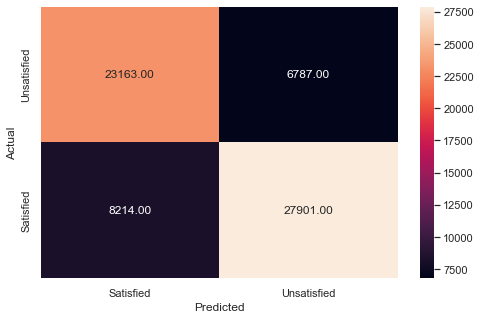

In [14]:
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

**Evaluate the model on the test set**

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     12836
           1       0.81      0.77      0.79     15478

    accuracy                           0.78     28314
   macro avg       0.78      0.78      0.78     28314
weighted avg       0.78      0.78      0.78     28314



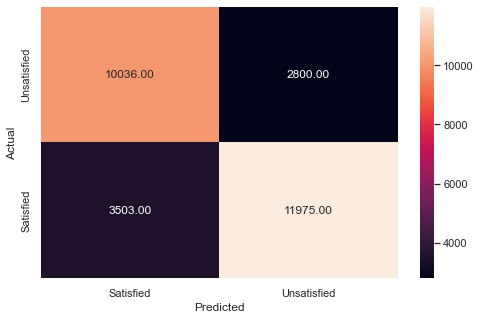

In [15]:
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

**Calculate precision/recall**

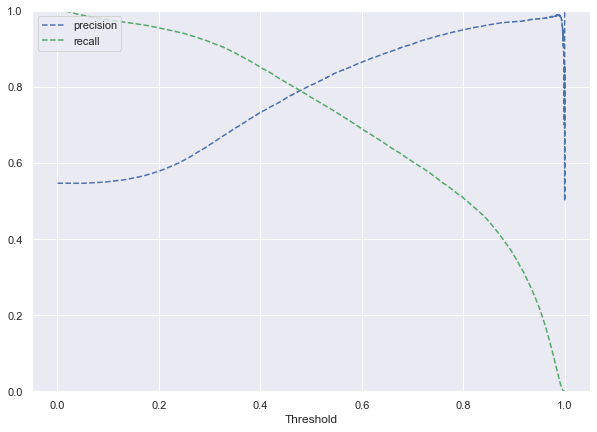

In [16]:
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])


# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [17]:
# Setting the optimal threshold
optimal_threshold = 0.45

              precision    recall  f1-score   support

           0       0.76      0.71      0.73     29950
           1       0.77      0.81      0.79     36115

    accuracy                           0.76     66065
   macro avg       0.76      0.76      0.76     66065
weighted avg       0.76      0.76      0.76     66065



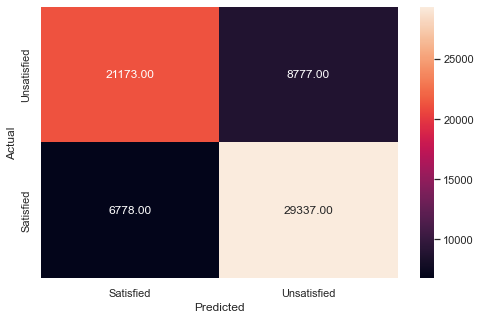

In [18]:
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.76      0.71      0.74     12836
           1       0.77      0.81      0.79     15478

    accuracy                           0.77     28314
   macro avg       0.77      0.76      0.76     28314
weighted avg       0.77      0.77      0.77     28314



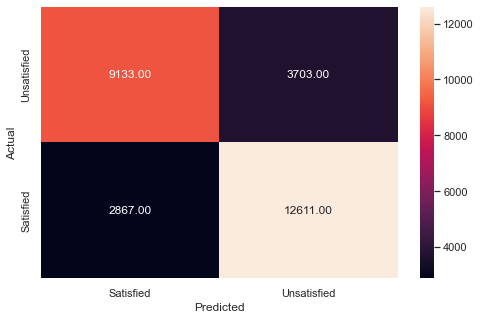

In [19]:
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

### **Support Vector Machine**

In [22]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [23]:
svm = SVC(kernel='linear', probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     29950
           1       0.87      0.80      0.83     36115

    accuracy                           0.83     66065
   macro avg       0.83      0.83      0.83     66065
weighted avg       0.83      0.83      0.83     66065



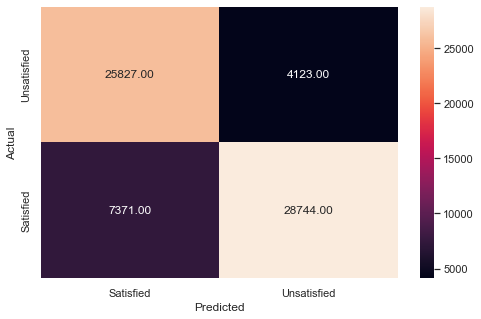

In [26]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     12836
           1       0.87      0.80      0.83     15478

    accuracy                           0.83     28314
   macro avg       0.83      0.83      0.82     28314
weighted avg       0.83      0.83      0.83     28314



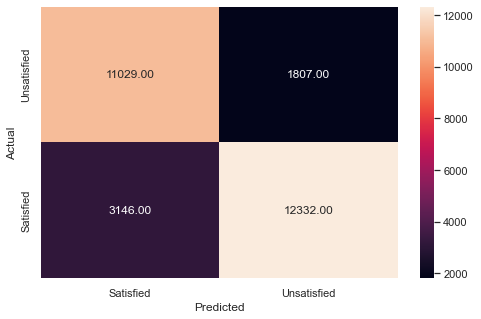

In [25]:
# Running time: around 10 minutes
# ------------------------------------------------
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

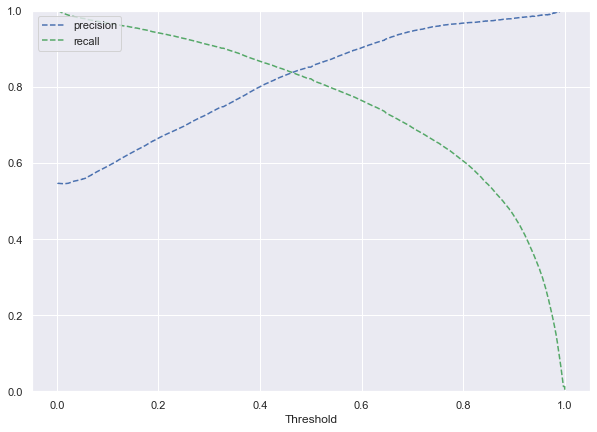

In [27]:
y_scores_svm=model.predict_proba(X_train_scaled)
precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])


# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [28]:
optimal_threshold_svm=0.43

              precision    recall  f1-score   support

           0       0.77      0.67      0.72     29950
           1       0.75      0.83      0.79     36115

    accuracy                           0.76     66065
   macro avg       0.76      0.75      0.75     66065
weighted avg       0.76      0.76      0.76     66065



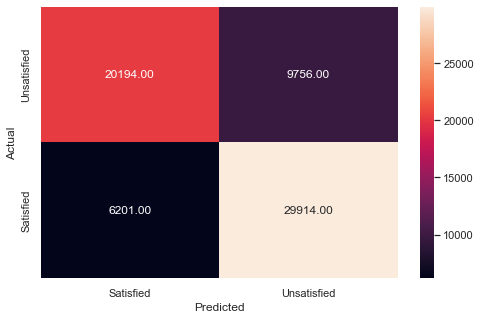

In [29]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     12836
           1       0.82      0.85      0.84     15478

    accuracy                           0.82     28314
   macro avg       0.82      0.81      0.81     28314
weighted avg       0.82      0.82      0.82     28314



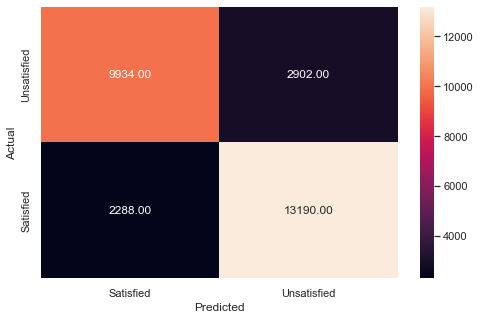

In [30]:
y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

### **Build a Support Vector Machines model using an RBF kernel**

In [31]:
svm_rbf=SVC(kernel='rbf',probability=True)
model = svm_rbf.fit(X_train_scaled,y_train)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     29950
           1       0.96      0.89      0.92     36115

    accuracy                           0.92     66065
   macro avg       0.92      0.92      0.92     66065
weighted avg       0.92      0.92      0.92     66065



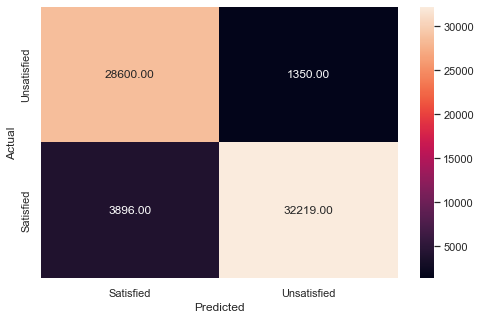

In [32]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     12836
           1       0.96      0.89      0.93     15478

    accuracy                           0.92     28314
   macro avg       0.92      0.92      0.92     28314
weighted avg       0.92      0.92      0.92     28314



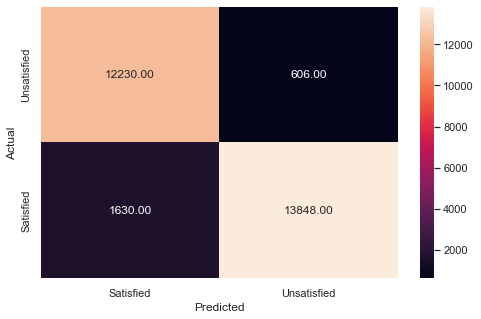

In [34]:
y_pred_test = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test)

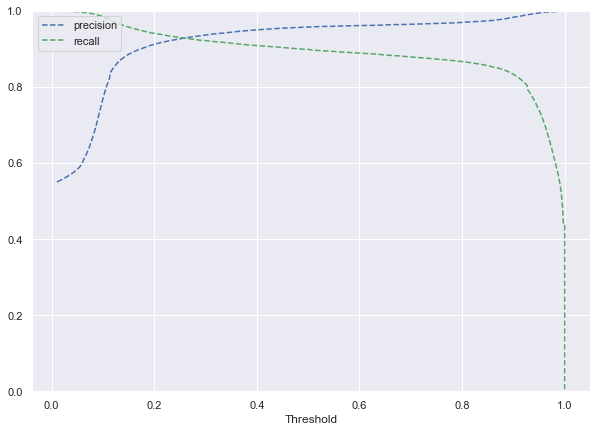

In [35]:
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [36]:
optimal_threshold_svm=0.23

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     29950
           1       0.92      0.93      0.93     36115

    accuracy                           0.92     66065
   macro avg       0.92      0.92      0.92     66065
weighted avg       0.92      0.92      0.92     66065



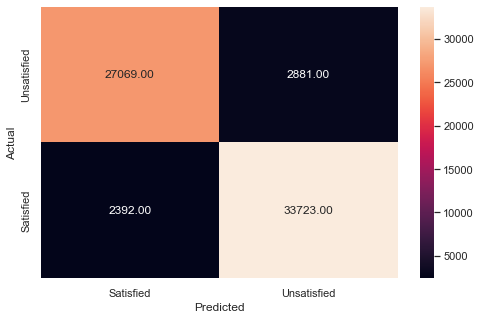

In [37]:
y_pred_train_svn = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svn[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     12836
           1       0.92      0.93      0.92     15478

    accuracy                           0.92     28314
   macro avg       0.92      0.92      0.92     28314
weighted avg       0.92      0.92      0.92     28314



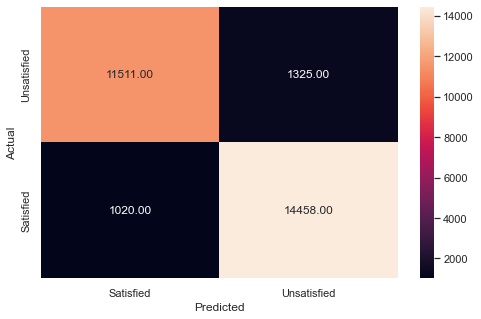

In [38]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

### **Decision Tree**

In [39]:
model_dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



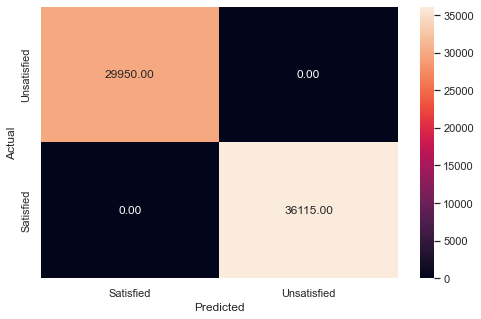

In [40]:
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     12836
           1       0.94      0.93      0.94     15478

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



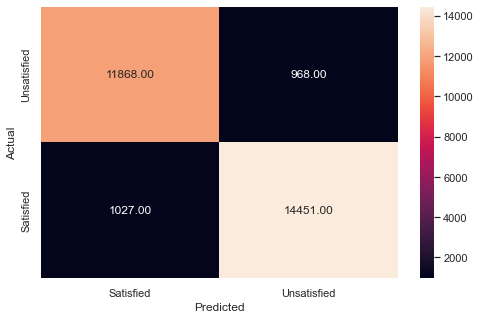

In [41]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**Perform hyperparameter tuning for the decision tree model using GridSearch CV**

In [44]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring = scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=4,
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.53      0.68     29950
           1       0.71      0.98      0.83     36115

    accuracy                           0.77     66065
   macro avg       0.83      0.75      0.75     66065
weighted avg       0.82      0.77      0.76     66065



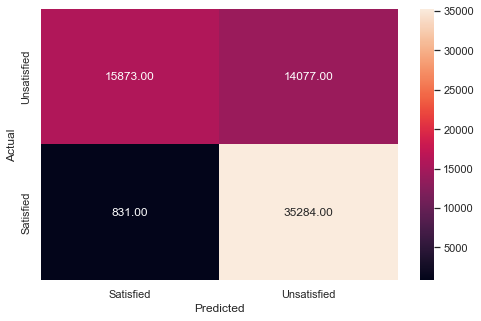

In [45]:
dt_tuned = estimator.predict(X_train)
metrics_score(y_train, dt_tuned)

              precision    recall  f1-score   support

           0       0.95      0.52      0.67     12836
           1       0.71      0.98      0.82     15478

    accuracy                           0.77     28314
   macro avg       0.83      0.75      0.75     28314
weighted avg       0.82      0.77      0.76     28314



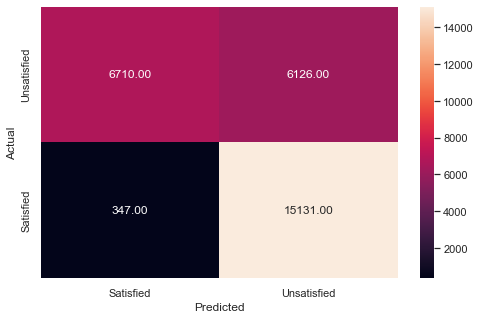

In [46]:
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test, y_pred_tuned)

#### **Visualizing the Decision Tree**

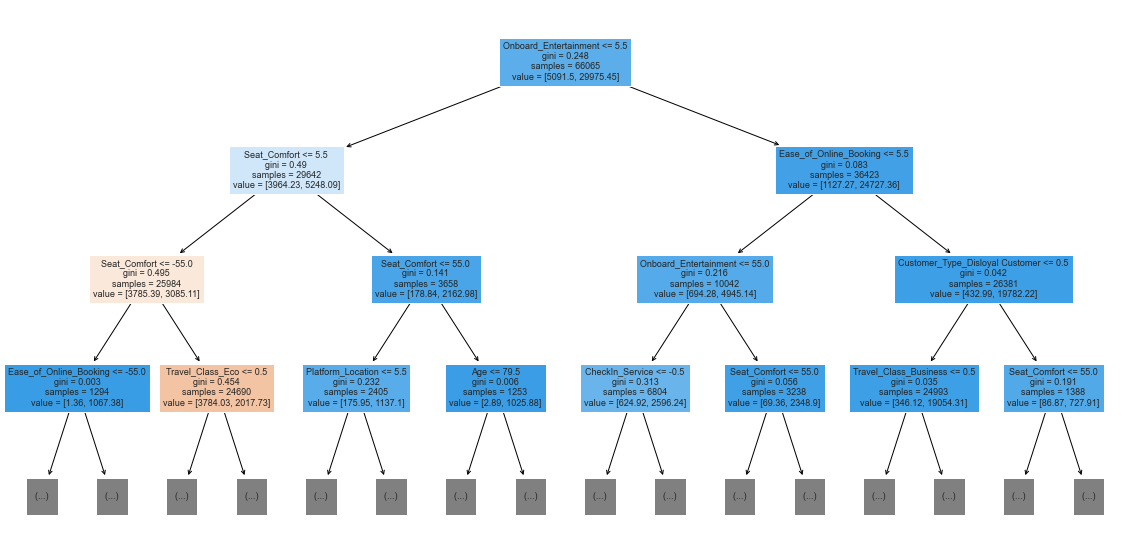

In [47]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

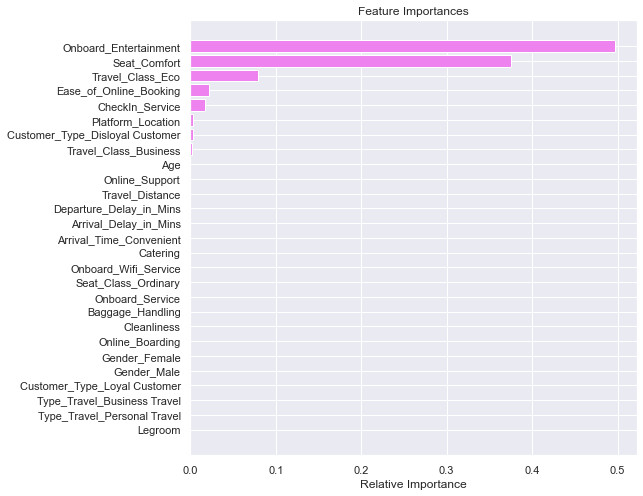

In [48]:
# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### **Random Forest**

In [50]:
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



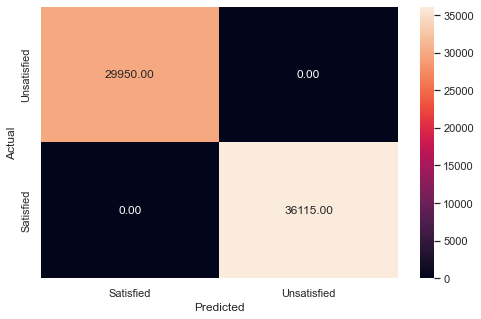

In [51]:
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12836
           1       0.96      0.95      0.95     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



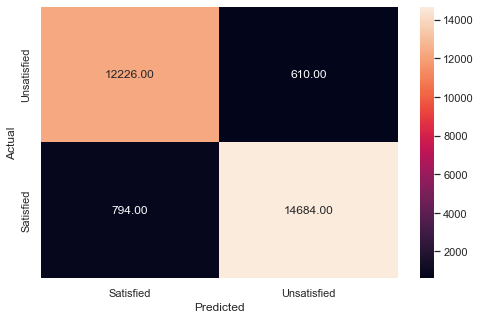

In [52]:
y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

<AxesSubplot:xlabel='Importance'>

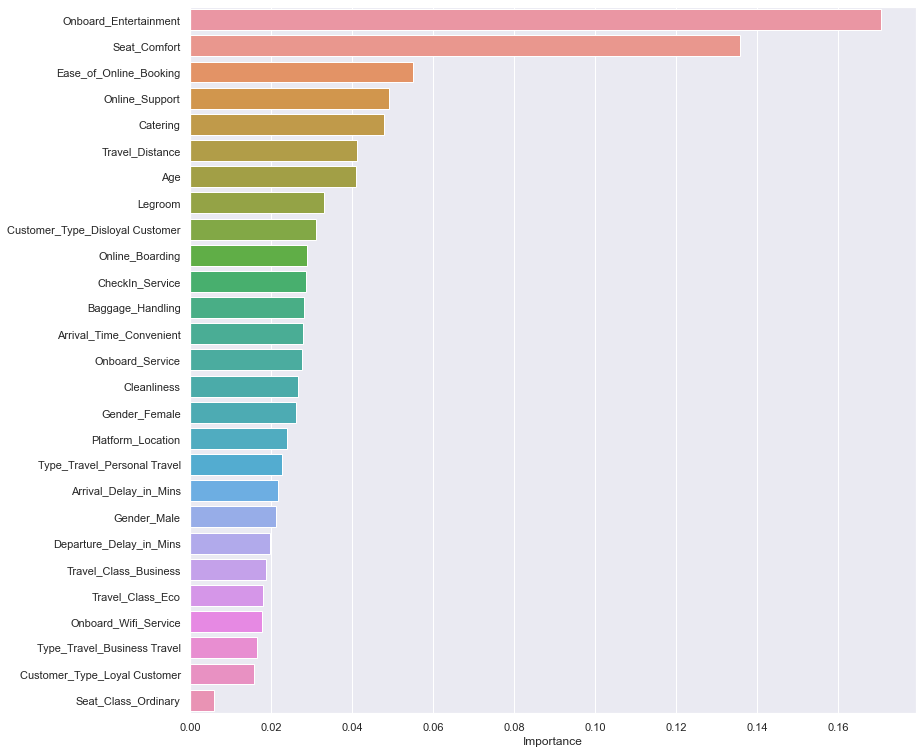

In [53]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

### **Hackathon Submission**

In [107]:
z_out = rf_estimator.predict(Z_test)

ValueError: X has 28 features, but RandomForestClassifier is expecting 27 features as input.

In [117]:
z_pd = pd.DataFrame(z_out)

result = pd.concat([Z_Ids.copy(), z_pd.copy()], axis=1)
result.columns = ['ID', 'Overall_Experience']
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID                  35602 non-null  int64
 1   Overall_Experience  35602 non-null  int64
dtypes: int64(2)
memory usage: 556.4 KB


In [119]:
result.to_csv("results/out.csv", index=False)